# Car price prediction model development

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

car_dataset = pd.read_csv('Automobile_data.csv', na_values='?')

<div class="alert alert-success alertdanger" style="margin-top: 20px">
<h3> Functions for preprocessing, already explored in the EDA notebook in this repository. </h3>

</div>


In [81]:
def replace_by_mean(dataframe, column):
    return dataframe[column].replace(np.nan, dataframe[column].mean(), inplace=True)

def replace_by_most_frequent(dataframe, column):
    return dataframe[column].replace(np.nan, dataframe[column].mode()[0], inplace=True)

def replace_nulls(dataframe, columns):
    for col in columns:
        if dataframe[col].dtype=='object':
            replace_by_most_frequent(dataframe, col)
        else:
            replace_by_mean(dataframe, col)

def preprocess(data):
    with_null_cols=list(data.columns[data.isna().any()])
    missing_dataset = data[with_null_cols].isna()
    replace_nulls(data, with_null_cols)
    
    return data

In [82]:
# Calling preprocess function to clean the data

cleaned_car=preprocess(car_dataset)

<div class="alert alert-success alertdanger" style="margin-top: 20px">
<h3> Developing linear models. </h3>

</div>


## 1. Simple Linear Regression

In [83]:
# define function for simple linear regression

def simple_lm(X, y):
    lm = LinearRegression()
    lm.fit(X, y)
    return lm.predict(X)

pred_price = simple_lm(cleaned_car[['engine-size']], cleaned_car['price'])

### Simple Linear regression Evaluation
<p>
    One way to evaluate model is to visualizing a <b>distribution plot</b> :
    <ul>
        <li> The <span style='color:red;'><b>red</b></span> plot represents the actual price .</li>
        <li> The <span style='color:green;'><b>green</b></span> plot represents the predicted price .</li>
    </ul>

</p>

D:\Utilisateurs\Lucasr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Utilisateurs\Lucasr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

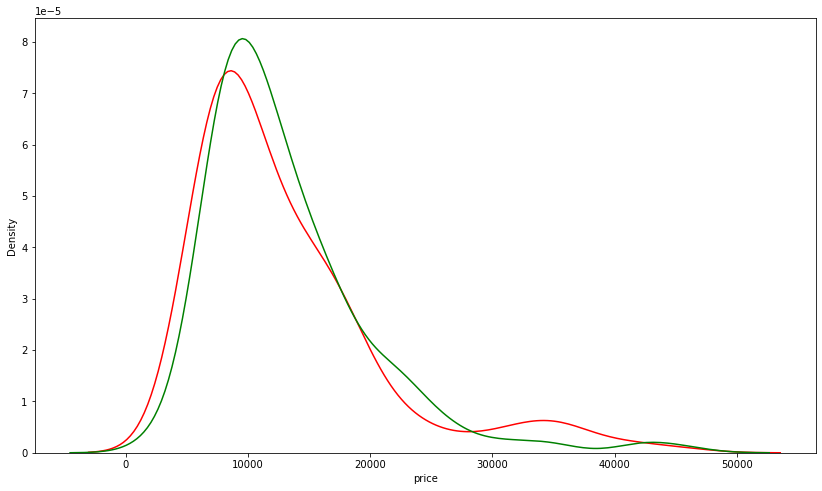

In [84]:
# Distribution plot

plt.figure(figsize=(14, 8))
ax1 = sns.distplot(cleaned_car['price'], hist=False, color='r', label="Actual price")
sns.distplot(pred_price, hist=False, color='g', label="Predicted price", ax=ax1)

## 2. Multiple variable Linear Regression

In [85]:
#  Defining pipeline for multiple linear regression

def multiple_linear_reg(X, y):
    in_steps = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('model', LinearRegression())]
    pipe = Pipeline(in_steps)
    pipe.fit(X, y)
    return pipe.predict(X), pipe.score

In [86]:
numerical_data=cleaned_car.select_dtypes(exclude=['object'])
y = numerical_data.pop('price')

In [87]:
predicted_price, r_score = multiple_linear_reg(numerical_data, y)

### Multiple Linear regression Evaluation
<p>
    One way to evaluate model is to visualizing a <b>distribution plot</b> :
    <ul>
        <li> The <span style='color:red;'><b>red</b></span> plot represents the actual price .</li>
        <li> The <span style='color:green;'><b>green</b></span> plot represents the predicted price .</li>
    </ul>
    The numerical data types attributes are good predictor for the price of a car.
</p>

D:\Utilisateurs\Lucasr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Utilisateurs\Lucasr\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

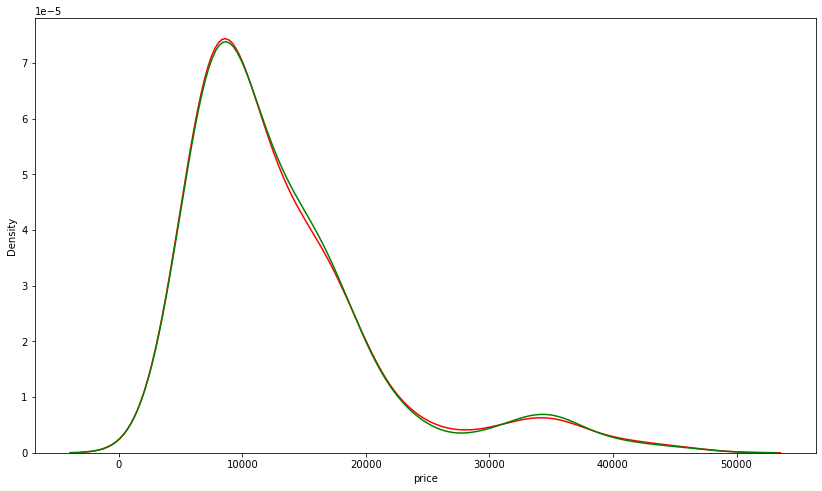

In [88]:
plt.figure(figsize=(14, 8))
sns.distplot(y, label='Actual Price', color='r', hist=False)
sns.distplot(predicted_price, label='Predicted Price', color='g', hist=False)

 <h3>Model Evaluation</h3>

<p>The visualization evaluation shows that a multiple regression would be a good predictor than the simple one.</p>